In [0]:
import numpy as np
import matplotlib.pyplot as plt

# **Data Generation**

This function will create an (m x 2)-sized array called data that holds (x, y) values for our model. It also creates an (m x 1)-sized array that holds the label information for each respective row in data.

In [0]:
def get_random_data(w, b, mu, sigma, m):

  # First feature, x1 is chosen formly at random within this interval
  x1 = np.random.uniform(0, 1, size=m)
  
  # Get the "noise" used to get our second feature, x2
  n = np.random.normal(mu, sigma, size=m)

  # c will be our label for each set of data, where each set can randomly be 0 or 1
  c = np.random.randint(0, 2, size=m)

  # Get the second feature, x2
  x2 = w * x1 + b + (-1)**c * n

  data, labels = np.column_stack((x1, x2)),  c
  
  return data, labels

This function graphs the data made in get_random_data(), as well as the function y = w * x + b

In [0]:
def display_random_data(labels, data, w, b):
  plt.style.use('seaborn')

  colors = ["blue", "red"]

  # Plot the scatterplots, separating them based on label
  for data, label in zip(data, labels):
    plt.scatter(data[0], data[1], label=label, c=colors[label], edgecolor="black", linewidth=1, alpha=0.75)
  
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Randomly Generated Data")

  # Plot the function y = m * w + b
  x = np.linspace(0, 1, 100)
  y = w * x + b 
  
  plt.plot(x,y)
  # plt.show()

Create our training and test data for our neural network. 

Train Data (800, 2)
Train Labels (800,)
Test Data (200, 2)
Test Labels (200,)


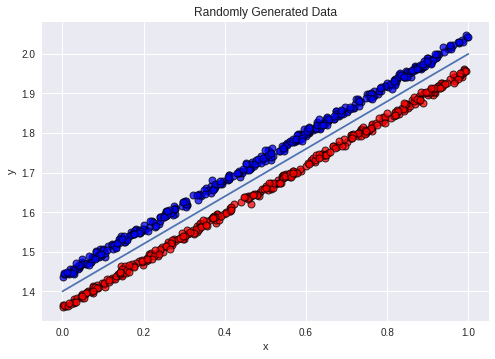

In [0]:
w = 0.6
b = 1.4
mu = 0.04
sigma = 0.006
m = 1000

# Get our randomized data
data, labels = get_random_data(w, b, mu, sigma, m)

# Split our data into two sets, a training and testing set
split = int(0.8 * m)
train_data, test_data = data[:split], data[split:]
train_labels, test_labels = labels[:split], labels[split:]

display_random_data(train_labels, train_data, w, b)

print("Train Data", train_data.shape)
print("Train Labels", train_labels.shape)
print("Test Data", test_data.shape)
print("Test Labels", test_labels.shape)

# **Model**

**Sigmoid Function**

The sigmoid function for our network is of the form: 

$\alpha(z) = \frac{1}{(1 + e^{-z})}$, where $z = \sum_{i=0}^{n} w_i(a_i)+b$, for a set of weights, **w**, a dataset, **a**, and a bias value, **b**. 

In [0]:
def sigmoid(z): 
  return 1.0 / (1.0 + np.exp(-z))

**Derivative of Sigmoid Function**

The derivative of the sigmoid function will be used to calculate the gradient for both the weights and the bias values. The derivative of this function is of the form:

$\alpha\prime(z) =  \alpha(z) * (1 - \alpha(z))$

In [0]:
def sigmoid_prime(z):
  a = sigmoid(z)
  return a * (1 - a)

**Stochastic Gradient Descent**

Stochastic gradient descent works by randomly choosing a value from the dataset and computing the intercept of the current line relative to the value's position. By repeatedly doing this, we eventually end up with weights that result in a fairly accurate representation of our data. 

In [0]:
epochs = 10
lr = 0.001
weights = np.random.rand(2)
bias = np.zeros(1)

print("Weights before", weights)
print("Bias before", bias)

Weights before [0.57560548 0.35749633]
Bias before [0.]


Code for Stochastic Gradient Descent modified (changed to logistic regression) from: [here](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-) 


In [0]:
for epoch in np.arange(epochs):
  idx = np.random.permutation(train_data.shape[0])
  x_s = train_data[idx]
  y_s = train_labels[idx]

  for x, y in zip(x_s, y_s): 
    # Trigger the activation function for our current set of data
    z = np.dot(x, weights) + bias
    a = sigmoid(z)

    # Get gradient values for weights and bias
    grad_w0 = (a - y) * x[0]
    grad_w1 = (a - y) * x[1]
    grad_b = (a - y)

    # Update values for weights and bias
    weights[0] = weights[0] - lr * grad_w0
    weights[1] =  weights[1] - lr * grad_w1
    bias = bias - lr * grad_b

print("Weights after", weights)
print("Bias after", bias)

Weights after [ 0.44495563 -0.09212694]
Bias after [-0.15019231]


# **Analyzing Our Model**

Now that we have created and trained our model, let's evaluate it and see how accurate we were. 

 

**Binary Cross Entropy**

Let's begin by creating our loss function, which will be binary cross entropy. Binary Cross Entropy is a function of the following form:

$L_{bce} = (-y)log(a) - (1 - y)log(1 - a)$, 

Where y is just the output for a given input, x, and a is the result of our sigmoid function.

In [0]:
def binary_cross_entropy(y, a):
  return (-y * np.log(a)) - ((1 - y) * np.log(1 - a))

**Accuracy Evaluation**

In [0]:
correct = 0
loss = 0
results = []

for x, y in zip(test_data, test_labels):
  # Calculate sigmoid function of the given value
  z = np.dot(x, weights)
  a = sigmoid(z)

  # Calculate binary cross entropy loss of the given value
  loss = loss + binary_cross_entropy(y, a)

  # Check if our predicted output equals the test label
  if int(np.round(a)) == y:
    correct = correct + 1
  
  loss = loss / test_data.shape[0]
  acc = (correct / test_data.shape[0]) * 100
  results = np.append(loss, acc)
  
print(results)

[3.34872418e-03 5.15000000e+01]


# **Displaying Results**

**Graph of Resulting Line**

0.4449556283358016
-0.09212694000851251


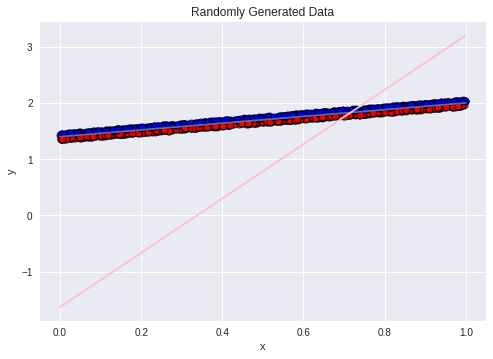

In [0]:
display_random_data(labels, data, w, b)

print(weights[0])
print(weights[1])

xl = np.linspace(0, 1, 100)
yl = - (weights[0] * xl + bias)/weights[1]
plt.plot(xl, yl, color='pink')
plt.show()

**Heatmap of Data**

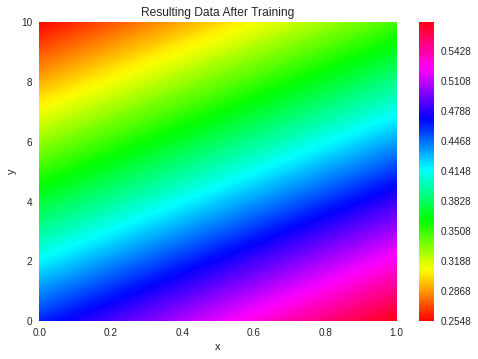

In [0]:
xl = np.linspace(0,1,100)
yl = np.linspace(0,10,100)

xlb, ylb = np.meshgrid(xl, yl)

z = xlb.ravel() * weights[0] + ylb.ravel() * weights[1] + bias[0]
a = sigmoid(z).reshape(xlb.shape)
plt.xlim([0,1])
plt.ylim([0, 10])

plt.contourf(xlb, ylb, a, m, cmap='hsv')
plt.colorbar()
plt.title("Resulting Data After Training")
plt.xlabel("x")
plt.ylabel("y")
plt.show()